# Bedeutung von Rechnerarchitekturen für das Maschinelle Lernen

    Dr.-Ing. Rüdiger Alshut

Here we have defined `header`, `footer` and `backimage` - [see also the customization doc](http://rise.readthedocs.io/en/latest/customize.html).

See [this other notebook](overlay.ipynb) for a short description of how to use `overlay` instead.

# The impact of Computer Architecture on Machine Learning

Here I demonstrate the effect of taking advantage of the Computer Architecture on the Gradient Descent Algorithm.

For Optimization the Gradient Descent Algorithm is with out any doubt the best starting point to get an understanding for optimization algorithms. Ther are many derivatives of this algorithm get to the global minimum, or to at least near to it, faster. But the basic principle stays the same. Here I implement in a basic way that makes it easer to understand:

1. *Batch* Gradient Descent
2. *Stochastic* Gradient Descent
3. Gradient Descent with *Mini-Batches*
4. Gradient Descent with *Mini-Batches* and *GPU-Parallization*


    /* this code block is 4-space indented */

```
# this code block is within triple backquotes
```

In [ ]:
from __future__ import print_function, division
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random, permutation, randint
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)
np.random.seed(123)

In [218]:
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def sse(y,y_pred): return ((y-y_pred)**2).sum()

Wir starten mit der Geradengleichung
\begin{equation}\label{eq:1}
y=a\mathbf{x}+b\
\end{equation}


In [2]:
def lin(a,b,x): return a*x+b

In [451]:
a=1
b=2
a_start=-5
b_start= -1
lr=0.01

In [452]:
n=30
noise=np.random.normal(0,.9,n)
x = random(n)
y = lin(a,b,x)+noise

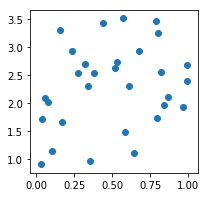

In [453]:
plt.scatter(x,y)

\begin{equation}\label{eq:2}
h_\theta(x)=\sum\limits_{i=0}^{n}\theta_j x_j\\
J(\theta)=\frac{1}{2m}\\sum\limits_{i=1}
\end{equation}


In [110]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    a_guess = a_guess - lr * len(x)**-1*((y_pred-y) * x).sum()
    b_guess = b_guess - lr * len(x)**-1*((y_pred-y)).sum()
    
    

In [111]:
def upd_stoastic(n):
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x[n])
    a_guess = a_guess - lr * (y_pred-y[n])*x[n]
    b_guess = b_guess - lr * (y_pred-y[n])

In [112]:
n=int(3e5)
a_start=-1
a_start=-2
x = random(n)
noise=np.random.normal(0,.9,n)
y = lin(a,b,x)+noise

In [117]:
%%time 
a_guess=a_start
b_guess=b_start
global run
run=0
for i in range(3000):
    run=run+1
    if np.mod(run,200)==1:
        print( "Run=%s, Loss= %.10s, a_guess= %.10s, b_guess= %.10s, a=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b)) #Print information about current loss
    upd()    
print( "Run=%s, Loss= %.10s, a_guess= %.10s, b_guess= %.10s, a=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))
    

Run=1, Loss= 6540942.17, a_guess= -2, b_guess= -1, a=1, b=2
Run=201, Loss= 305679.431, a_guess= -0.0995501, b_guess= 2.22817314, a=1, b=2
Run=401, Loss= 262409.294, a_guess= 0.15625788, b_guess= 2.42236883, a=1, b=2
Run=601, Loss= 258035.468, a_guess= 0.27056243, b_guess= 2.38702985, a=1, b=2
Run=801, Loss= 254847.580, a_guess= 0.36222133, b_guess= 2.34000146, a=1, b=2
Run=1001, Loss= 252397.008, a_guess= 0.44193276, b_guess= 2.29750894, a=1, b=2
Run=1201, Loss= 250512.405, a_guess= 0.51178386, b_guess= 2.26014739, a=1, b=2
Run=1401, Loss= 249063.052, a_guess= 0.57303601, b_guess= 2.22737541, a=1, b=2
Run=1601, Loss= 247948.430, a_guess= 0.62675103, b_guess= 2.19863529, a=1, b=2
Run=1801, Loss= 247091.231, a_guess= 0.67385663, b_guess= 2.17343147, a=1, b=2
Run=2001, Loss= 246432.002, a_guess= 0.71516608, b_guess= 2.15132887, a=1, b=2
Run=2201, Loss= 245925.024, a_guess= 0.75139259, b_guess= 2.13194590, a=1, b=2
Run=2401, Loss= 245535.132, a_guess= 0.78316158, b_guess= 2.11494792, a=1, 

In [116]:
%%time 
a_guess=a_start
b_guess=b_start
global run
run=0

for i in range(3):
    run=run+1
    np.random.seed(123)    
    print( "Run=%s, Loss= %.10s, a_guess= %.10s, b_guess= %.10s, a=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))
    for n in permutation(len(x)): 
            upd_stoastic(n)
print( "Run=%s, Loss= %.10s, a_guess= %.10s, b_guess= %.10s, a=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))

    

Run=1, Loss= 6540942.17, a_guess= -2, b_guess= -1, a=1, b=2
Run=2, Loss= 244639.159, a_guess= 1.13508257, b_guess= 1.92549915, a=1, b=2
Run=3, Loss= 244639.159, a_guess= 1.13508257, b_guess= 1.92549915, a=1, b=2
Run=3, Loss= 244639.159, a_guess= 1.13508257, b_guess= 1.92549915, a=1, b=2
Wall time: 3.51 s


In [103]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert inputs.shape[0] == targets.shape[0]
    if shuffle:
        indices = np.arange(inputs.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, inputs.shape[0], batchsize):
        end_idx = min(start_idx + batchsize, inputs.shape[0])
        if shuffle:
            excerpt = indices[start_idx:end_idx]
        else:
            excerpt = slice(start_idx, end_idx)
        yield inputs[excerpt], targets[excerpt]

In [ ]:
for n in xrange(n_epochs):
    for batch in iterate_minibatches(X, Y, batch_size, shuffle=True):
        x_batch, y_batch = batch
        l_train, acc_train = f_train(x_batch, y_batch)

    l_val, acc_val = f_val(Xt, Yt)
    logging.info('epoch ' + str(n) + ' ,train_loss ' + str(l_train) + ' ,acc ' + str(acc_train) + ' ,val_loss ' + str(l_val) + ' ,acc ' + str(acc_val))

# Animation Area

In [445]:
a_guess=a_start
b_guess=b_start
lr=0.1
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()
run=0
def animate_stochastic(i):
    global run
    line.set_ydata(lin(a_guess,b_guess,x))
    run=run+1
    if np.mod(run,10)==1:
        print( "Run = %d , Loss= %.10s, a_guess= %.10s, b_guess= %.10s, a=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))
    
    #np.random.seed(123)
    
#     for n in permutation(len(x)): 
#         print(n)
#         upd_stoastic(n)
    upd_stoastic(randint(len(x)))
    return line,
    

ani_stoch = animation.FuncAnimation(fig, animate_stochastic, np.arange(0, 70), interval=100)

ani_stoch

Run = 1 , Loss= 667.923732, a_guess= -2, b_guess= -1, a=1, b=2
Run = 11 , Loss= 101.878271, a_guess= -0.6600845, b_guess= 1.45328809, a=1, b=2
Run = 21 , Loss= 42.9491174, a_guess= -0.0716581, b_guess= 2.12164727, a=1, b=2
Run = 31 , Loss= 33.9373680, a_guess= 0.21827050, b_guess= 2.50587968, a=1, b=2
Run = 41 , Loss= 33.9715954, a_guess= 0.29757585, b_guess= 2.55717481, a=1, b=2
Run = 51 , Loss= 33.7469708, a_guess= 0.31214691, b_guess= 2.50330311, a=1, b=2
Run = 61 , Loss= 34.3013920, a_guess= 0.21320251, b_guess= 2.39840931, a=1, b=2
Run = 71 , Loss= 33.7764185, a_guess= 0.28090928, b_guess= 2.48995739, a=1, b=2


In [492]:
a_guess=a_start
b_guess=b_start
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()
run=0
def animate(i):
    global run
    line.set_ydata(lin(a_guess,b_guess,x))
    
    #print(run)
    for i in range(10): 
        run=run+1
        upd()
        if np.mod(run,10)==1:
            run=run
            print( "Run = %d , Loss= %.10s, a_guess= %.10s, b_guess= %.10s, a=%.10s, b=%.10s" % (run, loss(y,a_guess,b_guess,x),a_guess,b_guess,a,b))
        #print(i)
    return line,
    

ani = animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=100)
print(a_guess)
print(b_guess)
print(loss(y,a_guess,b_guess,x))
ani


-5
-1
1112.2133781506543
Run = 1 , Loss= 1085.20032, a_guess= -4.9658133, b_guess= -0.9420159, a=1, b=2
Run = 11 , Loss= 849.787938, a_guess= -4.6454779, b_guess= -0.4019133, a=1, b=2
Run = 21 , Loss= 667.349108, a_guess= -4.3609870, b_guess= 0.07206654, a=1, b=2
Run = 31 , Loss= 525.945779, a_guess= -4.1080625, b_guess= 0.48786040, a=1, b=2
Run = 41 , Loss= 416.330504, a_guess= -3.8829391, b_guess= 0.85245345, a=1, b=2
Run = 51 , Loss= 331.340029, a_guess= -3.6823027, b_guess= 1.17199348, a=1, b=2
Run = 61 , Loss= 265.425549, a_guess= -3.5032364, b_guess= 1.45189122, a=1, b=2
Run = 71 , Loss= 214.288845, a_guess= -3.3431728, b_guess= 1.69690871, a=1, b=2
Run = 81 , Loss= 174.600421, a_guess= -3.1998520, b_guess= 1.91123706, a=1, b=2
Run = 91 , Loss= 143.781173, a_guess= -3.0712851, b_guess= 2.09856491, a=1, b=2
Run = 101 , Loss= 119.833264, a_guess= -2.9557213, b_guess= 2.26213862, a=1, b=2
Run = 111 , Loss= 101.209118, a_guess= -2.8516197, b_guess= 2.40481533, a=1, b=2
Run = 121 , Lo

In [257]:
print(a_guess)
print(b_guess)
print(loss(y,a_guess,b_guess,x))

-0.34816504025594835
1.3176568127813217
65.04806289905129


In [255]:
# # Animate SGD
# a_guess=a_start
# b_guess=b_start
# fig = plt.figure(dpi=100, figsize=(5, 4))
# plt.scatter(x,y)
# line, = plt.plot(x,lin(a_guess,b_guess,x))
# plt.close()
# def animate2(i):
#     run=run+1
#     print(run)
#     line.set_ydata(lin(a_guess,b_guess,x))
#     np.random.seed(123)
#     for n in permutation(len(x)): 
#         print(n)
#         upd_stoastic(n)
#     return line,

-1.0
0.1
262.9351874418169


In [243]:
ani = animation.FuncAnimation(fig, animate2, np.arange(0, 40), interval=100)
ani
print(a_guess)
print(b_guess)
print(loss(y,a_guess,b_guess,x))

-1.0
0.1
262.9351874418169


In [251]:
b

2

In [200]:
random.normal(0,1,10)

AttributeError: 'builtin_function_or_method' object has no attribute 'normal'